#### Tathiane Ribeiro Souza - Matrícula: 389957

# Mineração de Dados
A base de dados que irei utilizar é de uma empresa produtora de rosas. Onde explorarei os dados de vendas da mesma, descobrindo quais são as rosas/flores mais vendidas e os conjuntos de regras que podem ser obtidos. 
Utilizei o algoritmo apriori para extrair as regras de associação, e a para ilustrar essas associações utilizei a biblioteca NetworkX do python. Adotei o Processo de extração do conhecimento - KDD, para realizar está mineração. 
##### Este processo consiste em:
1. Seleção dos dados: É onde se toma a decisão de qual base de dados utilizar.
2. Pré-Processamento: Onde acontece a limpeza dos dados e seleção de atributos.
3. Transformação: Os dados da etapa anterior são analisados e reorganizados de uma forma especifica para que possam ser interpretados na etapa seguinte.
4. Data Mining: A mineração faz com que meros dados sejam transformados em informações para serem posteriormente  interpretados.
5. Interpretação e avaliação: É onde as regras indicadas pelo processo anterior serão interpretadas e avaliadas. Após a interpretação poderão surgir padrões, relacionamentos e descoberta de novos fatos, que podem ser utilizados para pesquisas, otimização e outros.

In [20]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings('ignore')


## 1. Seleção dos dados:

A minha escolha por essa base foi pensando em aplicar os conhecimentos adquiridos na disciplina em algo do mundo real.

In [21]:
dataset=pd.read_csv('./dataset.csv', encoding='utf-8')
dataset.head()

,Id_Cliente,Pedido,Numero_NF,Data,Semana,Situacao,Cd_Prd,Produto,Und,Qtd_Emb,Qtde,Val_Unt_Bruto,Val_Desconto,Val_Unt_Liquido,Val_Total_Bruto,Desconto_Total,Total_Liquido
0,1,12704,1399714.0,07/10/19,41,FINALIZADO,455,GYPSOFILA DINAMIC LOVE 70CM C/10,UND,2.0,20,8.00,0.0,8.00,160.0,0.0,160.0
1,1,12704,1399714.0,07/10/19,41,FINALIZADO,823,LISIANTHUS BRANCO 60CM C/8,UND,1.0,8,12.00,0.0,12.00,96.0,0.0,96.0
2,1,12704,1399714.0,07/10/19,41,FINALIZADO,4921,ROSA SPRAY BRANCA 60CM C/60,UND,1.0,60,0.90,0.0,0.90,54.0,0.0,54.0
3,2,11938,1399095.0,01/10/19,40,FINALIZADO,286,ROSA REBU 50CM C/100,UND,1.0,100,0.68,0.0,0.68,68.0,0.0,68.0
4,2,11938,1399095.0,01/10/19,40,FINALIZADO,7586,ROSA REBU 60CM C/100,UND,1.0,100,0.88,0.0,0.88,88.0,0.0,88.0


#### Descrição da base bruta

* Id_Cliente (Identificador do cliente)
* Pedido	(Numero do pedido)
* Numero_NF (Número da nota fiscal)
* Data (Data do dia da compra)
* Semana (Número correspondente a semana do ano)	
* Situacao (Indica se o pedido já foi finalizado) 	
* Cd_Prd (Código do pedido)	
* Produto (Nome do produto)	
* Und (Indica se a embalagem era caixa ou unidade)	
* Qtd_Emb (Número de produtos contidos na embalagem)	
* Qtde (Quantidade de produtos da venda)	
* Val_Unt_Bruto (Valor do produto sem desconto)	
* Val_Desconto (Valor do desconto sobre o produto)	
* Val_Unt_Liquido (Valor do produto após o desconto)		
* Val_Total_Bruto (Valor do produto sem desconto)		
* Desconto_Total (Valor de descontos sobre os produtos)	
* Total_Liquido (Valor após os descontos)	

In [22]:
dataset.shape   # Como pode ser visto, existem 17 colunas e 14271 linhas.

(14271, 17)

In [23]:
dataset['Produto'].nunique()   # Quantos produtos essa empresa tem no catálago de vendas?

421

In [24]:
dataset['Produto'].value_counts().sort_values(ascending=False).head(20)      # Produtos mais vendidos

GYPSOFILA DINAMIC LOVE 60CM C/10     762
GIRASSOL SUNRISH ORANGE 70CM C/36    395
ROSA BOEING 60CM C/120               352
ROSA REBU 60CM C/100                 346
ROSA REBU 50CM C/100                 261
ROSA VARIADA 60CM C/120              252
ROSA PEACH AVALANCHE 50CM C/120      227
GYPSOFILA DINAMIC LOVE 70CM C/10     224
ROSA DOLOMIT 60CM C/120              212
ROSA REVIVAL 50CM C/120              212
ROSA IPANEMA 60CM C/120              212
ROSA ZILDA 50CM C/120                188
BOCA DE LEAO BRANCA 70CM A1 C/120    188
ROSA DOLOMIT 50CM C/120              179
ROSA SPRAY BRANCA 60CM C/60          173
LIMONIUM AZUL 70CM C/8               167
ROSA SWEET MEMORY 50CM C/100         164
ROSA PEACH AVALANCHE 60CM  C/120     154
BOCA DE LEAO ROSA 70CM A1 C/120      151
GERBERA VARIADA C/80                 144
Name: Produto, dtype: int64

Text(0.5, 1.0, 'Mais vendidos')

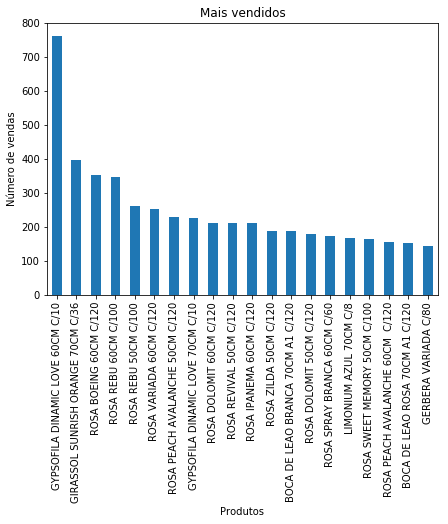

In [25]:
figura, ax   = plt.subplots(figsize=(7,5))
dataset['Produto'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Número de vendas')
plt.xlabel('Produtos')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Mais vendidos')

## 2. Pré-Processamento

* Ao explorar esse conjunto de dados, descobri que (3264) foram rotulados como 'NULL'. Então, removi esses itens do dataset além de outras colunas que não eram importantes para a minha perquisa.

In [26]:
dataset.isnull().sum().sort_values(ascending=False).head(10)  

Numero_NF         3264
Total_Liquido        0
Produto              0
Pedido               0
Data                 0
Semana               0
Situacao             0
Cd_Prd               0
Und                  0
Desconto_Total       0
dtype: int64

In [27]:
dataset_atual = dataset.drop(columns=['Semana','Situacao','Numero_NF','Und','Qtd_Emb','Val_Desconto','Val_Total_Bruto','Val_Unt_Bruto','Desconto_Total','Val_Unt_Liquido','Total_Liquido'])

In [28]:
dataset_atual.shape

(14271, 6)

In [29]:
dataset_atual.head()

,Id_Cliente,Pedido,Data,Cd_Prd,Produto,Qtde
0,1,12704,07/10/19,455,GYPSOFILA DINAMIC LOVE 70CM C/10,20
1,1,12704,07/10/19,823,LISIANTHUS BRANCO 60CM C/8,8
2,1,12704,07/10/19,4921,ROSA SPRAY BRANCA 60CM C/60,60
3,2,11938,01/10/19,286,ROSA REBU 50CM C/100,100
4,2,11938,01/10/19,7586,ROSA REBU 60CM C/100,100


In [30]:
dataset_atual.describe()

,Id_Cliente,Pedido,Cd_Prd,Qtde
count,14271.000000,14271.000000,14271.000000,14271.000000
mean,266.783057,13693.270619,4509.569617,222.484970
std,159.073196,1227.883490,7957.135220,379.795457
min,1.000000,11232.000000,9.000000,1.000000
25%,124.000000,12602.000000,410.000000,36.000000
50%,259.000000,13662.000000,3272.000000,120.000000
75%,404.000000,14696.000000,7167.000000,240.000000
max,553.000000,15989.000000,81940.000000,9840.000000


In [31]:
#dataset_atual.info()

Removi 11 colunas
#### Descrição da base pré-processada
* Id_Cliente (Identificador do cliente)
* Pedido	(Numero do pedido)
* Data (Data do dia da compra)
* Cd_Prd (Código do pedido)	
* Produto (Nome do produto)		
* Qtde (Quantidade de produtos da venda)

## 3. Transformação ou formatação

* Para começar com a análise de regras de associação, criei um conjunto de dados que contém listas de itens que são comprados juntos.

In [32]:
lista=[]
for item in dataset_atual['Pedido'].unique():
    lista_aux=list(set(dataset_atual[dataset_atual['Pedido']==item]['Produto']))
    if len(lista_aux)>0:
        lista.append(lista_aux)
#for a in lista:
#    print(a)
print(lista[0:4])
print(len(lista))

[['LISIANTHUS BRANCO 60CM C/8', 'ROSA SPRAY BRANCA 60CM C/60', 'GYPSOFILA DINAMIC LOVE 70CM C/10'], ['ROSA REBU 60CM C/100', 'ROSA REBU 50CM C/100'], ['ROSA REBU 40CM C/120'], ['BEGONIA P15', 'ANTURIO VARIADO P12', 'CRISANTEMO MINI P13']]
3094


* Para o algoritmo Apriori, esse conjunto de dados precisa ser codificado faço uso do método one-hot encoded. Isso é realizado usando o TransactionEncoder, como mostrado aqui. 

In [33]:
te      = TransactionEncoder()
te_data = te.fit(lista).transform(lista)
data_s  = pd.DataFrame(te_data,columns=te.columns_)
#print(data_s.head())

## 4. Data Mining

### Algoritmo Apriori e regra de associação:
* O algoritmo Apriori é utilizado para extrair os conjuntos de produtos frequentes que  são usados para análise de regras de associação. Nesse algoritmo, o usuário define um suporte mínimo que servirá para decidir se um conjunto de produtos é considerado 'frequente'.
A seguir pretendo realizar uma análise de regras de associação que dê uma idéia de como as coisas estão se associando. 
##### As métricas comuns para medir a associação são:
1. Support - É a medida da frequência ou abundância de um item em um conjunto de dados. Pode ser 'suporte antecedente', 'consequente suporte' e 'suporte'. 'suporte do antecedente' contém a proporção de transações realizadas para o antecedente, enquanto 'suporte consequente' envolve aquelas do consequente. O 'suporte' é calculado para o antecedente e o consequente em questão.
2. Confidence - Fornece a probabilidade do consequente em uma transação, dada a presença do antecedente.
3. Lift - Dado que antecedentes e consequentes são independentes, com que frequência eles ocorrem juntos.
4. Leverage - É a diferença entre a frequência do antecedente e o consequente em conjunto nas transações para a frequência de ambos em transações independentes.
5. Conviction - Uma pontuação mais alta de convicção significa que o consequente é altamente dependente do antecedente.

* Utilizei o algoritmo apriori para obter os conjuntos de itens frequentes. Com taxa de suporte de 3,5%.
* No próximo passo utilizo a função de regras de associação, que pode receber qualquer métrica. Aqui eu utilizei 'lift' e especifiquei o limite mínimo como 1.

In [34]:
itens_frequentes_l = apriori(data_s, use_colnames=True, min_support=0.035)
print(itens_frequentes_l.head(10))

regras = association_rules(itens_frequentes_l, metric="lift", min_threshold=1.0)
regras.antecedents = regras.antecedents.apply(lambda x: next(iter(x))) # fará com que seja exibido apenas o nome do produto no grafo abaixo
regras.consequents = regras.consequents.apply(lambda x: next(iter(x)))
regras

    support                                 itemsets
0  0.035553           (ALSTROEMERIA AKEMI 70CM C/80)
1  0.045572  (ALSTROEMERIA WHINTNEY 70CM A1 C/100-T)
2  0.060763      (BOCA DE LEAO BRANCA 70CM A1 C/120)
3  0.048804        (BOCA DE LEAO ROSA 70CM A1 C/120)
4  0.036846                  (FOLHAGEM PITOSPORO SB)
5  0.046218                   (GERBERA VARIADA C/80)
6  0.127666      (GIRASSOL SUNRISH ORANGE 70CM C/36)
7  0.245960       (GYPSOFILA DINAMIC LOVE 60CM C/10)
8  0.072398       (GYPSOFILA DINAMIC LOVE 70CM C/10)
9  0.053006                 (LIMONIUM AZUL 70CM C/8)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,GIRASSOL SUNRISH ORANGE 70CM C/36,GYPSOFILA DINAMIC LOVE 60CM C/10,0.127666,0.245960,0.052683,0.412658,1.677746,0.021282,1.283818
1,GYPSOFILA DINAMIC LOVE 60CM C/10,GIRASSOL SUNRISH ORANGE 70CM C/36,0.245960,0.127666,0.052683,0.214192,1.677746,0.021282,1.110110
2,ROSA REBU 60CM C/100,GIRASSOL SUNRISH ORANGE 70CM C/36,0.111829,0.127666,0.039431,0.352601,2.761894,0.025154,1.347444
3,GIRASSOL SUNRISH ORANGE 70CM C/36,ROSA REBU 60CM C/100,0.127666,0.111829,0.039431,0.308861,2.761894,0.025154,1.285082
4,ROSA BOEING 60CM C/120,GYPSOFILA DINAMIC LOVE 60CM C/10,0.113769,0.245960,0.044279,0.389205,1.582390,0.016297,1.234521
5,GYPSOFILA DINAMIC LOVE 60CM C/10,ROSA BOEING 60CM C/120,0.245960,0.113769,0.044279,0.180026,1.582390,0.016297,1.080805
6,ROSA REBU 60CM C/100,GYPSOFILA DINAMIC LOVE 60CM C/10,0.111829,0.245960,0.045895,0.410405,1.668583,0.018390,1.278911
7,GYPSOFILA DINAMIC LOVE 60CM C/10,ROSA REBU 60CM C/100,0.245960,0.111829,0.045895,0.186597,1.668583,0.018390,1.091919


* Em seguida, utilizei o NetworkX (um pacote Python para criação e estudo de redes complexas) para construir um gráfico de rede para verificar a associação entre antecedentes e consequentes obtidos após a regra de associação. Como pode ser visto, a Gypsofila Dinamic Love é um item muito popular. Portanto, se uma pessoa está comprando um dos três produtos, as chances de comprar um Gypsofila Dinamic são altas (o inverso também é verdadeiro, isto é, se uma pessoa está comprando um Gypsofila Dinamic, a probabilidade de ela comprar qualquer um dos três itens é alta). Também notamos uma associação entre o trio: Gypsofila Dinamic Love, Girassol Sunrish Orange e Rosa Rebu. 


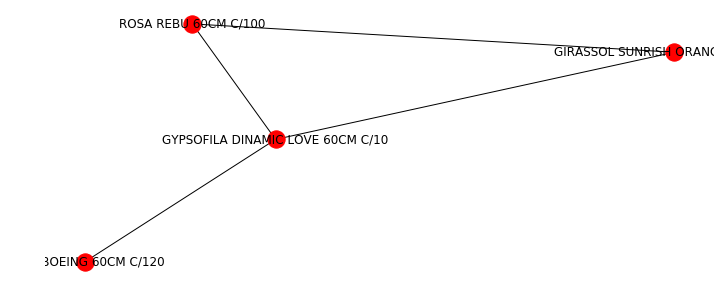

In [35]:
figura     = plt.subplots(figsize=(12,5))
grafo      = nx.from_pandas_edgelist(regras,source='antecedents',target='consequents')
nx.draw(grafo,with_labels=True)
plt.show()


* Quando aumentamos o nível de confiança para 36%, já não temos mais o trio: Gypsofila Dinamic Love, Girassol Sunrish Orange e Rosa Rebu, como podemos verificar abaixo

In [36]:
regras[(regras['confidence'] > 0.36) &
       (regras['lift'] > 1.0) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,GIRASSOL SUNRISH ORANGE 70CM C/36,GYPSOFILA DINAMIC LOVE 60CM C/10,0.127666,0.24596,0.052683,0.412658,1.677746,0.021282,1.283818
4,ROSA BOEING 60CM C/120,GYPSOFILA DINAMIC LOVE 60CM C/10,0.113769,0.24596,0.044279,0.389205,1.582390,0.016297,1.234521
6,ROSA REBU 60CM C/100,GYPSOFILA DINAMIC LOVE 60CM C/10,0.111829,0.24596,0.045895,0.410405,1.668583,0.018390,1.278911


* Em contrapartida se diminuirmos o suporte para 2,5%, podemos elevar a confiança para 40% e obtiremos um maior número de regras.

In [37]:
itens_frequentes_l = apriori(data_s, use_colnames=True, min_support=0.025)
#print(itens_frequentes_l.head(10))

regras2 = association_rules(itens_frequentes_l, metric="confidence", min_threshold=0.4)
regras2.antecedents = regras2.antecedents.apply(lambda x: next(iter(x))) # fará com que seja exibido apenas o nome do produto no grafo abaixo
regras2.consequents = regras2.consequents.apply(lambda x: next(iter(x)))
regras2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,BOCA DE LEAO BRANCA 70CM A1 C/120,GYPSOFILA DINAMIC LOVE 60CM C/10,0.060763,0.245960,0.025856,0.425532,1.730086,0.010911,1.312588
1,GIRASSOL SUNRISH ORANGE 70CM C/36,GYPSOFILA DINAMIC LOVE 60CM C/10,0.127666,0.245960,0.052683,0.412658,1.677746,0.021282,1.283818
2,ROSA DOLOMIT 60CM C/120,GYPSOFILA DINAMIC LOVE 60CM C/10,0.068520,0.245960,0.030381,0.443396,1.802717,0.013528,1.354716
3,ROSA REBU 60CM C/100,GYPSOFILA DINAMIC LOVE 60CM C/10,0.111829,0.245960,0.045895,0.410405,1.668583,0.018390,1.278911
4,ROSA VARIADA 60CM C/120,GYPSOFILA DINAMIC LOVE 60CM C/10,0.081448,0.245960,0.033613,0.412698,1.677909,0.013581,1.283906
5,ROSA ZILDA 50CM C/120,GYPSOFILA DINAMIC LOVE 60CM C/10,0.060763,0.245960,0.026826,0.441489,1.794965,0.011881,1.350091
6,ROSA ZILDA 50CM C/120,ROSA PEACH AVALANCHE 50CM C/120,0.060763,0.073368,0.027149,0.446809,6.089980,0.022691,1.675066


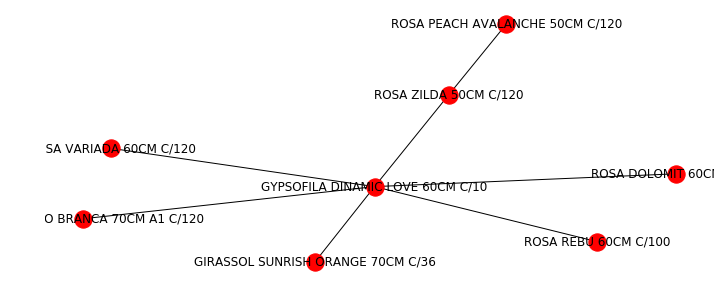

In [38]:
figura2     = plt.subplots(figsize=(12,5))
grafo2      = nx.from_pandas_edgelist(regras2,source='antecedents',target='consequents')
nx.draw(grafo2,with_labels=True)
plt.show()

## 5. Interpretação e avaliação
- A Gypsofila Dinamic Love é a rosa mais vendida desta empresa e mostra uma associação maior com outros 3 produtos: Rosa Rebu, Rosa Boeing e Girassol Sunrish Orange, quando utilizado a taxa de suporte de 3,5%.
- Podemos notar também que há uma certa confiança na compra do trio: Gypsofila Dinamic Love, Girassol Sunrish Orange e Rosa Rebu, quando utilizadado o suporte de 3,5% e taxa de confiança menor ou igual 35%.
- Já quando diminui o suporte para 2,5% e mesmo aumentando a confiança para 40%, obtivemos um número maior de associações.

  Existem algumas estratégias que a empresa pode adotar (se ainda não as estiver usando) para aumentar suas vendas, considerando a associação que vimos entre a Gypsofila Dinamic Love, Girassol Sunrish Orange e Rosa Rebu.

1. O desconto promocional em um dos três produtos pode atrair os clientes a comprar Gypsofila Dinamic(ou o contrário, também funcionará).
2. Colocar esses 3 produtos próximos, pode ser uma boa estratégia para atrair mais clientes (o que vemos muitas vezes acontecer em muitas empresas).
3. Que tal arranjos expostos utilizando esses produtos? Isso atrairá os amantes dessas flores?